<a href="https://colab.research.google.com/github/rifqol/studpen/blob/tugas-2/SC61416_Muhammad_Rifqi_Fadhilah_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

age= age in years

sex= 0:women, 1:men

cp= chest pain type (4 values:0-3)

trestbps= resting blood pressure

chol= serum cholestoral in mg/dl

gbs= fasting blood sugar > 120 mg/dl

restecg= resting electrocardiographic results (values 0,1,2)

thalach= maximum heart rate achieved

exang= exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

slope= the slope of the peak exercise ST segment

ca= number of major vessels (0-3) colored by flourosopy

thal= thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target= presence of heart disease in the patient(0 = no disease and 1 = disease)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# A. missing Value

df.isnull().sum()

# There is no missing value in this dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# B. Duplicate Value

# if you want try different columns just change the age and change with the columns you want.
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dfnew = df.drop_duplicates()

dfnew.reset_index(drop= True, inplace= True)
dfnew.index += 1

dfnew

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


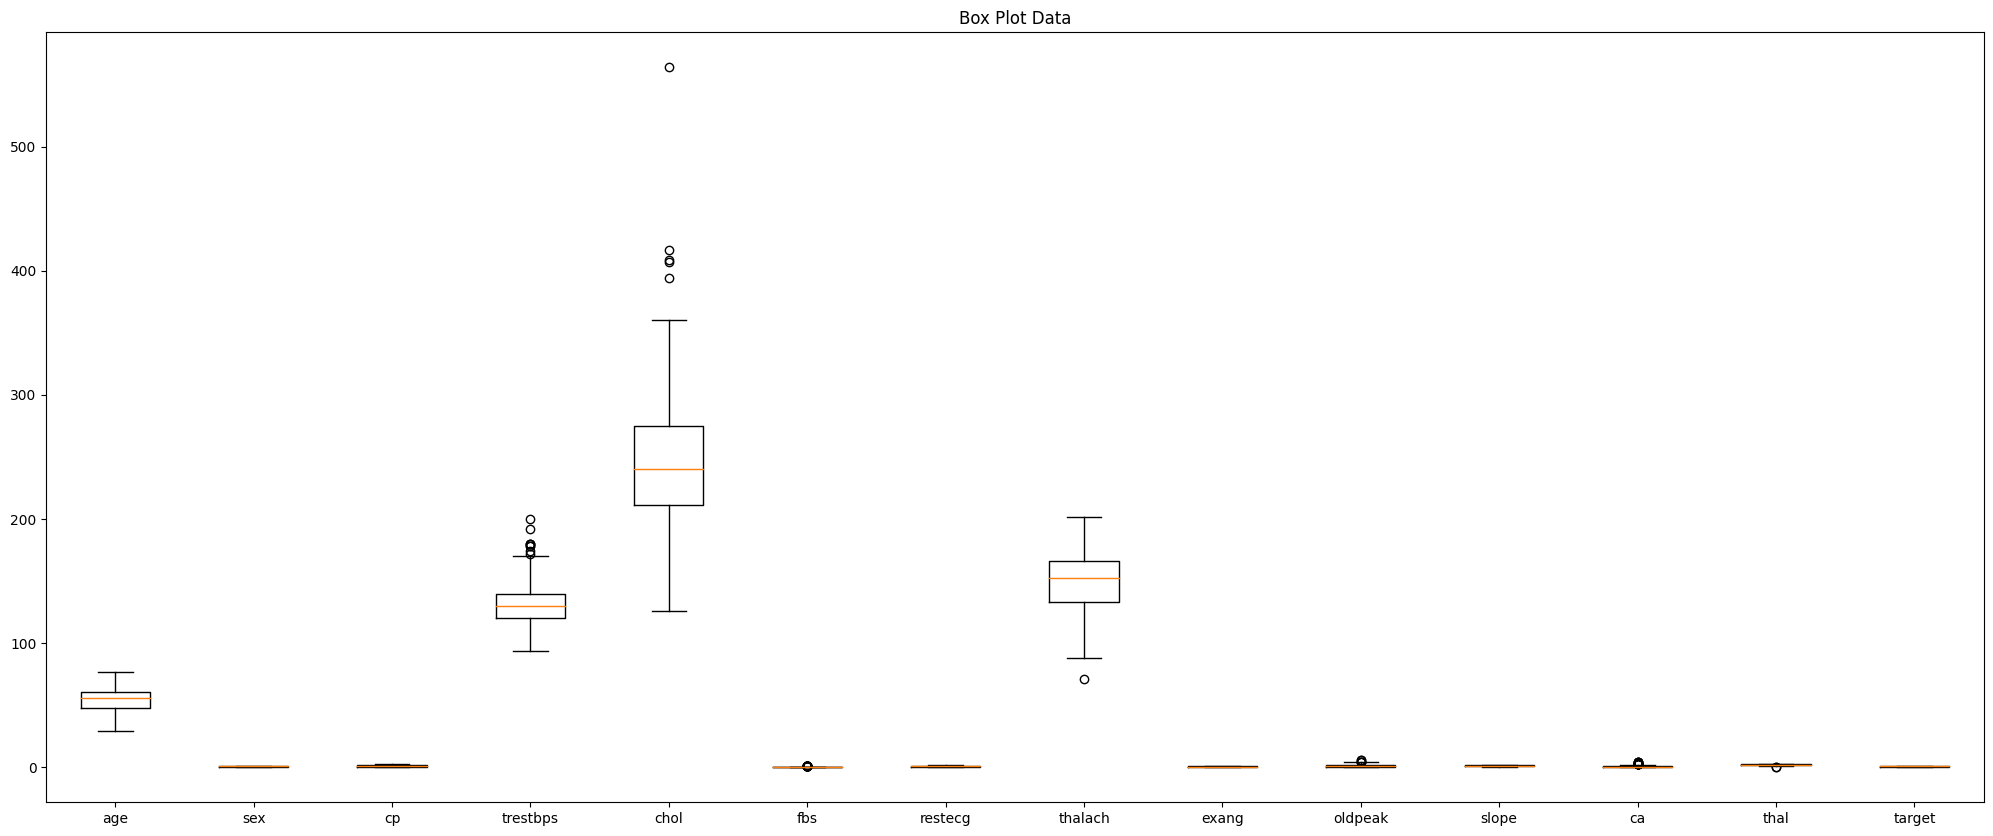

In [ ]:
# C. Outlier

plt.figure(figsize=(25, 10))
plt.boxplot(dfnew.values, labels=dfnew.columns)
plt.title('Box Plot Data')
plt.show()

# setelah melakukan evaluasi diputuskan untuk tidak menghapus outlier karena dalam penyakit jantung di butuhkan semua data sebagai referensi

In [ ]:
# Imbalance Data

imbalance = dfnew['target'].value_counts()

#Mencari kelas mayoritas dan kelas minoritas dari jumlah penderita penyakit jantung
kelas_penderita = imbalance.idxmax()
kelas_bukanpenderita = imbalance.idxmin()

print("Kelas Mayoritas:", kelas_penderita)
print("Jumlah Sampel Kelas Mayoritas:",imbalance[kelas_penderita])
print("Kelas Minoritas:", kelas_bukanpenderita)
print("Jumlah Sampel Kelas Minoritas:", imbalance[kelas_bukanpenderita])

# Tidak dilakukan penyeimbangan karena hanya sedikit perbedaan pada data

Kelas Mayoritas: 1
Jumlah Sampel Kelas Mayoritas: 164
Kelas Minoritas: 0
Jumlah Sampel Kelas Minoritas: 138


In [ ]:
dfnew.dtypes

# semua data sudah numerical, jadi tidak perlu di encode lagi

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Data Analysis (EDA)

In [ ]:
dfnew

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
dfnew.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
modus = dfnew.mode
modus()
# mencari nilai modus pada data frame yang sudah di cleansing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfnew.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


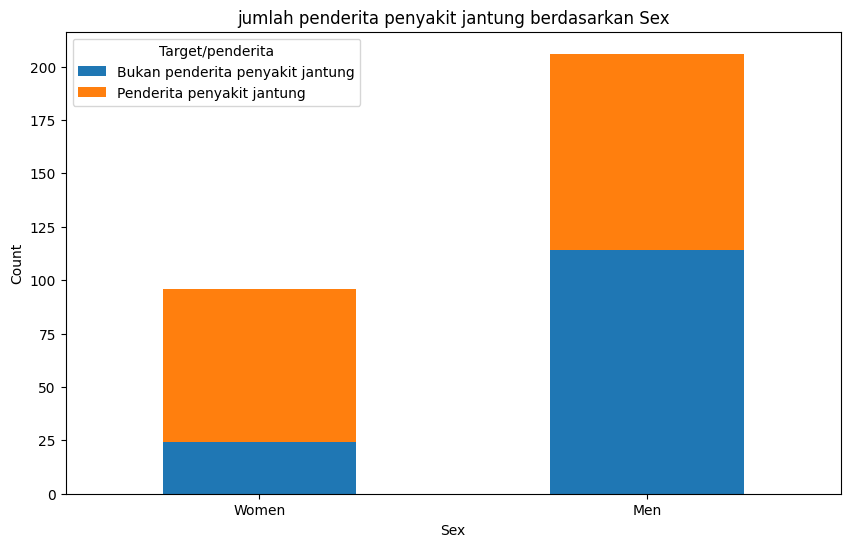

In [ ]:
target_counts = dfnew.groupby('sex')['target'].value_counts().unstack()

ax=target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('jumlah penderita penyakit jantung berdasarkan Sex')
plt.legend(labels=['Bukan penderita penyakit jantung', 'Penderita penyakit jantung'], title='Target/penderita')
ax.set_xticklabels(['Women', 'Men'], rotation=0)
plt.show()

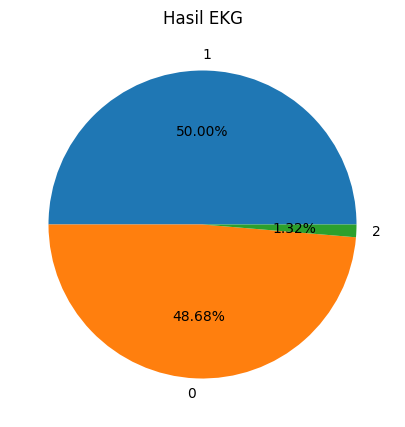

In [ ]:
# persebaran data hasil EKG

restecg_counts = dfnew['restecg'].value_counts()
fig=plt.figure(figsize=(10,5))
plt.pie(restecg_counts, labels=restecg_counts.index,autopct='%1.2f%%')
plt.title('Hasil EKG')
plt.show()

In [ ]:
# Data persebaran slope dan old peak
# yang dimana slope adalah data the slope of the peak exercise ST segment
# dan data oldpeak adalah ST depression induced by exercise relative to rest

chart = px.scatter(dfnew, x="slope", y="oldpeak")
chart.update_layout(xaxis=dict(tickmode='linear', dtick=1))
chart.show()

# Feature Engineering

In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
dfnew.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# 1. menghitung jumlah penderita jantung dalam rentang umur 10 tahun, untuk mengetahui rentang umur berapa yang paling beresiko terkena penyakit jantung

bins = range(20, 100, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
dfnew['age_group'] = pd.cut(dfnew['age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah penderita penyakit jantung dalam setiap rentang umur
heart_disease_count = dfnew.groupby('age_group')['target'].sum()

# Menampilkan informasi jumlah penderita penyakit jantung dalam rentang umur
heart_disease_count

<ipython-input-20-17a10b70c007>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age_group
20-29     1
30-39    10
40-49    50
50-59    65
60-69    32
70-79     6
80-89     0
Name: target, dtype: int64

In [ ]:
# 2. Mengkategorikan tekanan darah untuk mencari relevansi tekanan darah dan penderita penyakit jantung

def categorize_blood_pressure(trestbps):
    if trestbps < 90:
        return 'Normal'
    elif 90 <= trestbps < 120:
        return 'Normal'
    else:
        return 'Tinggi'

# Create new categorical feature 'resting_blood_pressure_category'
dfnew['resting_blood_pressure_category'] = dfnew['trestbps'].apply(categorize_blood_pressure)

# Display the DataFrame
dfnew

<ipython-input-21-55e72dd6c237>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,resting_blood_pressure_category
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59,Tinggi
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59,Tinggi
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79,Tinggi
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69,Tinggi
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60-69,Tinggi
299,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,40-49,Normal
300,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,50-59,Tinggi
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,50-59,Tinggi


In [ ]:
# 3. Mengetahui batas kolesterol sebagai pencegahan terhadap penyakit jantung

def status_chol(chol):
    if chol < 200:
        return 'normal'
    elif 200 <= chol < 239:
        return 'batas_tinggi'
    else:
        return 'tinggi'

dfnew.insert(7, 'status_kolesterol', dfnew['chol'].apply(status_chol))
dfnew

,age,sex,cp,trestbps,chol,fbs,restecg,status_kolesterol,thalach,exang,oldpeak,slope,ca,thal,target,age_group,resting_blood_pressure_category
1,52,1,0,125,212,0,1,batas_tinggi,168,0,1.0,2,2,3,0,50-59,Tinggi
2,53,1,0,140,203,1,0,batas_tinggi,155,1,3.1,0,0,3,0,50-59,Tinggi
3,70,1,0,145,174,0,1,normal,125,1,2.6,0,0,3,0,70-79,Tinggi
4,61,1,0,148,203,0,1,batas_tinggi,161,0,0.0,2,1,3,0,60-69,Tinggi
5,62,0,0,138,294,1,1,tinggi,106,0,1.9,1,3,2,0,60-69,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,0,batas_tinggi,115,0,1.5,1,0,2,1,60-69,Tinggi
299,44,0,2,108,141,0,1,normal,175,0,0.6,1,0,2,1,40-49,Normal
300,52,1,0,128,255,0,1,tinggi,161,1,0.0,2,1,3,0,50-59,Tinggi
301,59,1,3,160,273,0,0,tinggi,125,0,0.0,2,0,2,0,50-59,Tinggi


In [ ]:
# 4. mengetahui status diabetes untuk mencegah penyakit jantung

def status_fbs(fbs):
    if fbs == 1:
        return 'diabetes'
    else:
        return 'normal'

dfnew.insert(6, 'status_diabetes', dfnew['fbs'].apply(status_fbs))
dfnew

,age,sex,cp,trestbps,chol,fbs,status_diabetes,restecg,status_kolesterol,thalach,exang,oldpeak,slope,ca,thal,target,age_group,resting_blood_pressure_category
1,52,1,0,125,212,0,normal,1,batas_tinggi,168,0,1.0,2,2,3,0,50-59,Tinggi
2,53,1,0,140,203,1,diabetes,0,batas_tinggi,155,1,3.1,0,0,3,0,50-59,Tinggi
3,70,1,0,145,174,0,normal,1,normal,125,1,2.6,0,0,3,0,70-79,Tinggi
4,61,1,0,148,203,0,normal,1,batas_tinggi,161,0,0.0,2,1,3,0,60-69,Tinggi
5,62,0,0,138,294,1,diabetes,1,tinggi,106,0,1.9,1,3,2,0,60-69,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,normal,0,batas_tinggi,115,0,1.5,1,0,2,1,60-69,Tinggi
299,44,0,2,108,141,0,normal,1,normal,175,0,0.6,1,0,2,1,40-49,Normal
300,52,1,0,128,255,0,normal,1,tinggi,161,1,0.0,2,1,3,0,50-59,Tinggi
301,59,1,3,160,273,0,normal,0,tinggi,125,0,0.0,2,0,2,0,50-59,Tinggi


In [ ]:
# 5. Diabetes dan hipertensi adalah gejala penyakit jantung. karena itu kita bisa mencari pasien yang berpotensi memiliki penyakit jantung dari sana

def prediksi(row):
  if row['target'] == 0:
    if row['resting_blood_pressure_category'] == 'Tinggi' and row['status_diabetes'] == 'diabetes':
        return 'Berpotensi terkena penyakit jantung'
    else:
        return 'Tidak berpotensi terkena penyakit jantung'
  else:
    return 'Sudah memiliki penyakit jantung'

dfnew['prediksi_thdp_diabetes_hipertensi'] = dfnew.apply(prediksi, axis=1)
dfnew

<ipython-input-25-33fd37145700>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,cp,trestbps,chol,fbs,status_diabetes,restecg,status_kolesterol,thalach,exang,oldpeak,slope,ca,thal,target,age_group,resting_blood_pressure_category,prediksi_thdp_diabetes_hipertensi
1,52,1,0,125,212,0,normal,1,batas_tinggi,168,0,1.0,2,2,3,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung
2,53,1,0,140,203,1,diabetes,0,batas_tinggi,155,1,3.1,0,0,3,0,50-59,Tinggi,Berpotensi terkena penyakit jantung
3,70,1,0,145,174,0,normal,1,normal,125,1,2.6,0,0,3,0,70-79,Tinggi,Tidak berpotensi terkena penyakit jantung
4,61,1,0,148,203,0,normal,1,batas_tinggi,161,0,0.0,2,1,3,0,60-69,Tinggi,Tidak berpotensi terkena penyakit jantung
5,62,0,0,138,294,1,diabetes,1,tinggi,106,0,1.9,1,3,2,0,60-69,Tinggi,Berpotensi terkena penyakit jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,normal,0,batas_tinggi,115,0,1.5,1,0,2,1,60-69,Tinggi,Sudah memiliki penyakit jantung
299,44,0,2,108,141,0,normal,1,normal,175,0,0.6,1,0,2,1,40-49,Normal,Sudah memiliki penyakit jantung
300,52,1,0,128,255,0,normal,1,tinggi,161,1,0.0,2,1,3,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung
301,59,1,3,160,273,0,normal,0,tinggi,125,0,0.0,2,0,2,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung


In [ ]:
# 6. Berdasarkan PJNHK (Pusat Jantung Nasional Harapan Kita), detak jantung yang normal saat berolahraga(thalach) adalah 220-usia.
# Jika sudah detak jantungnya diatas dari normal thalach, maka dapat diberikan perawatan.

normal = 220 - dfnew['age']

# Check if normal heart rate is less than thalach
dfnew['normal_thalach'] = np.where(normal < dfnew['thalach'], 'Tidak normal', 'Normal')

# Display the updated DataFrame
dfnew

<ipython-input-28-f954765bcbd4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,cp,trestbps,chol,fbs,status_diabetes,restecg,status_kolesterol,thalach,exang,oldpeak,slope,ca,thal,target,age_group,resting_blood_pressure_category,prediksi_thdp_diabetes_hipertensi,normal_thalach
1,52,1,0,125,212,0,normal,1,batas_tinggi,168,0,1.0,2,2,3,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal
2,53,1,0,140,203,1,diabetes,0,batas_tinggi,155,1,3.1,0,0,3,0,50-59,Tinggi,Berpotensi terkena penyakit jantung,Normal
3,70,1,0,145,174,0,normal,1,normal,125,1,2.6,0,0,3,0,70-79,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal
4,61,1,0,148,203,0,normal,1,batas_tinggi,161,0,0.0,2,1,3,0,60-69,Tinggi,Tidak berpotensi terkena penyakit jantung,Tidak normal
5,62,0,0,138,294,1,diabetes,1,tinggi,106,0,1.9,1,3,2,0,60-69,Tinggi,Berpotensi terkena penyakit jantung,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,normal,0,batas_tinggi,115,0,1.5,1,0,2,1,60-69,Tinggi,Sudah memiliki penyakit jantung,Normal
299,44,0,2,108,141,0,normal,1,normal,175,0,0.6,1,0,2,1,40-49,Normal,Sudah memiliki penyakit jantung,Normal
300,52,1,0,128,255,0,normal,1,tinggi,161,1,0.0,2,1,3,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal
301,59,1,3,160,273,0,normal,0,tinggi,125,0,0.0,2,0,2,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal


In [ ]:
# 7. Oldpeak (depresi ST) adalah pengukuran perubahan pada segmen ST pada elektrokardiogram (EKG) yang dapat mengindikasikan masalah pada jantung.
# Nilai depresi ST yang melebihi 1 sering dianggap abnormal. Untuk itu, dapat dilakukan pencegahan.

def status_oldpeak(oldpeak):
    if oldpeak <=  1.0:
        return 'normal'
    else:
        return 'abnormal'

dfnew.insert(15, 'status_oldpeak', dfnew['oldpeak'].apply(status_oldpeak))
dfnew

,age,sex,cp,trestbps,chol,fbs,status_diabetes,restecg,status_kolesterol,thalach,...,oldpeak,slope,ca,thal,status_oldpeak,target,age_group,resting_blood_pressure_category,prediksi_thdp_diabetes_hipertensi,normal_thalach
1,52,1,0,125,212,0,normal,1,batas_tinggi,168,...,1.0,2,2,3,normal,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal
2,53,1,0,140,203,1,diabetes,0,batas_tinggi,155,...,3.1,0,0,3,abnormal,0,50-59,Tinggi,Berpotensi terkena penyakit jantung,Normal
3,70,1,0,145,174,0,normal,1,normal,125,...,2.6,0,0,3,abnormal,0,70-79,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal
4,61,1,0,148,203,0,normal,1,batas_tinggi,161,...,0.0,2,1,3,normal,0,60-69,Tinggi,Tidak berpotensi terkena penyakit jantung,Tidak normal
5,62,0,0,138,294,1,diabetes,1,tinggi,106,...,1.9,1,3,2,abnormal,0,60-69,Tinggi,Berpotensi terkena penyakit jantung,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,0,2,120,211,0,normal,0,batas_tinggi,115,...,1.5,1,0,2,abnormal,1,60-69,Tinggi,Sudah memiliki penyakit jantung,Normal
299,44,0,2,108,141,0,normal,1,normal,175,...,0.6,1,0,2,normal,1,40-49,Normal,Sudah memiliki penyakit jantung,Normal
300,52,1,0,128,255,0,normal,1,tinggi,161,...,0.0,2,1,3,normal,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal
301,59,1,3,160,273,0,normal,0,tinggi,125,...,0.0,2,0,2,normal,0,50-59,Tinggi,Tidak berpotensi terkena penyakit jantung,Normal


In [ ]:
# 8. Mengetahui penderita jantung yang memiliki diabetes, untuk mengetahui relevansi diabetes dan penyakit jantung

heart_disease_counts = dfnew[dfnew['target']==1].shape[0]
# Hitung jumlah penderita penyakit jantung yang juga memiliki diabetes
heart_disease_diabetes_count = dfnew[(dfnew['target'] == 1) & (dfnew['fbs'] == 1)].shape[0]

# Tampilkan jumlah penderita penyakit jantung yang juga memiliki diabetes
print("Jumlah penderita penyakit jantung:", heart_disease_counts)
print("Jumlah penderita penyakit jantung yang juga memiliki diabetes:", heart_disease_diabetes_count)

Jumlah penderita penyakit jantung: 164
Jumlah penderita penyakit jantung yang juga memiliki diabetes: 23
